In [1]:
#This code illustrates step by step how to use bootstrapping to calculate medians and errors of medians

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.gridspec as gridspec
import ast
import sys
sys.path.append('../machine-scientist/')
sys.path.append('../machine-scientist/Prior/')
from mcmc import *
from parallel import *
from fit_prior import read_prior_par
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error

In [4]:
#Read error dataframe for all simulations
#function='tanh'
errors=pd.read_csv('../../data/'+ 'all_errors' + '.csv',index_col=0)
display(errors)

,sigma,function,mae_nn_train,mae_nn_test,mae_mdl_train,mae_mdl_test,rmse_nn_train,rmse_nn_test,rmse_mdl_train,rmse_mdl_test,n,r
0,0.0,leaky_ReLU,0.014531,0.047835,0.000799,0.032633,0.019052,0.056589,0.001039,0.045034,0,0
1,0.0,leaky_ReLU,0.038948,0.250292,0.007437,0.197682,0.043878,0.270347,0.010081,0.218711,1,0
2,0.0,leaky_ReLU,0.007357,0.153327,0.005103,0.175677,0.009675,0.183943,0.006735,0.206563,2,0
3,0.0,leaky_ReLU,0.019419,0.311185,0.001652,0.067233,0.047197,0.320803,0.002061,0.080441,3,0
4,0.0,leaky_ReLU,0.006737,0.059373,0.002559,1.141700,0.014963,0.067198,0.002954,1.636346,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
655,0.2,tanh,0.077065,0.121007,0.025333,0.127387,0.108053,0.141900,0.040428,0.134413,5,2
656,0.2,tanh,0.082055,0.125623,0.083983,0.275630,0.116901,0.130110,0.118438,0.277328,6,2
657,0.2,tanh,0.092784,0.114085,0.094920,0.028182,0.122117,0.114988,0.116271,0.031750,7,2
658,0.2,tanh,0.090931,0.285506,0.059270,0.319420,0.115085,0.288816,0.077461,0.427289,8,2


In [5]:
#Calculate medians over 30 simulations and drop 'maes'
columns_errors=['rmse_nn_train','rmse_nn_test','rmse_mdl_train','rmse_mdl_test']
medians=errors.groupby(['sigma'],as_index=False)[columns_errors].median()
display(medians)

,sigma,rmse_nn_train,rmse_nn_test,rmse_mdl_train,rmse_mdl_test
0,0.00,0.015596,0.116815,0.002047,0.084071
1,0.02,0.016714,0.103825,0.011498,0.121841
2,0.04,0.022784,0.129494,0.019334,0.099823
3,0.06,0.030492,0.178212,0.027726,0.107041
4,0.08,0.039964,0.127672,0.037522,0.129676
5,0.10,0.054000,0.178993,0.044550,0.143375
6,0.12,0.053076,0.169892,0.048315,0.175494
7,0.14,0.070198,0.126127,0.067515,0.270394
8,0.16,0.100851,0.221427,0.080503,0.251755
9,0.18,0.090535,0.200388,0.081853,0.291115


In [6]:
#Calculate errors of medians
#Start with the subdataframe for sigma=0.0 and the rmse of the training set of neural networks as a minimally working example
sigma_0=errors[errors['sigma']==0.0]
display(sigma_0)

#Take the column that corresponds to the root mean squared error (rmse) of the training set (train) of neural networks (nn)
mmdltr=list(sigma_0.rmse_mdl_train)

,sigma,function,mae_nn_train,mae_nn_test,mae_mdl_train,mae_mdl_test,rmse_nn_train,rmse_nn_test,rmse_mdl_train,rmse_mdl_test,n,r
0,0.0,leaky_ReLU,0.014531,0.047835,0.000799,3.263260e-02,0.019052,0.056589,0.001039,4.503370e-02,0,0
1,0.0,leaky_ReLU,0.038948,0.250292,0.007437,1.976818e-01,0.043878,0.270347,0.010081,2.187113e-01,1,0
2,0.0,leaky_ReLU,0.007357,0.153327,0.005103,1.756766e-01,0.009675,0.183943,0.006735,2.065629e-01,2,0
3,0.0,leaky_ReLU,0.019419,0.311185,0.001652,6.723254e-02,0.047197,0.320803,0.002061,8.044060e-02,3,0
4,0.0,leaky_ReLU,0.006737,0.059373,0.002559,1.141700e+00,0.014963,0.067198,0.002954,1.636346e+00,4,0
5,0.0,leaky_ReLU,0.008021,0.151840,0.001963,6.916164e-01,0.009271,0.176308,0.002709,1.063898e+00,5,0
6,0.0,leaky_ReLU,0.008485,0.066332,0.001709,7.749797e+00,0.010034,0.079052,0.002319,1.987530e+01,6,0
7,0.0,leaky_ReLU,0.009947,0.128580,0.003525,5.098019e-02,0.013126,0.140995,0.004895,6.495707e-02,7,0
8,0.0,leaky_ReLU,0.052214,0.191471,0.018853,7.190364e-02,0.067443,0.199297,0.024252,8.384447e-02,8,0
9,0.0,leaky_ReLU,0.006645,0.215010,0.001852,5.065167e-02,0.015820,0.233245,0.002634,6.495447e-02,9,0


In [6]:
#Manual bootstrap

#one bootstrap
rng = np.random.default_rng(seed=1111) #pseudo random number generator
bootstrapped_indices=rng.integers(low=0, high=len(mmdltr), size=len(mmdltr)) #Uniformly sample 30 integers with replacement from [0,30]
bootstrap=[mmdltr[i] for i in bootstrapped_indices] #Get bootstrapped sample
median=np.median(bootstrap) #calculate median of the bootstrapped sample

In [7]:
#30 resamples
resamples=30
bootstrap_distributions={};bootstrap_medians=[]
for j in range(resamples):

    bootstrapped_indices_j=rng.integers(low=0, high=len(mmdltr), size=len(mmdltr))
    bootstrap_j=[mmdltr[j] for j in bootstrapped_indices_j]
    bootstrap_distributions[j]=bootstrap_j
    bootstrap_medians.append(np.median(bootstrap_j))


#95% CI
ci_cutoff=int(0.025*resamples)
print(ci_cutoff)
bootstrap_medians=np.sort(bootstrap_medians)
bootstrap_medians_test=bootstrap_medians[ci_cutoff: (len(bootstrap_medians) - ci_cutoff)]

print(bootstrap_medians)
print(len(bootstrap_medians))
print(bootstrap_medians_test)

0
[0.00026748 0.00033731 0.00033731 0.00033731 0.00037607 0.0003877
 0.00038848 0.00038848 0.00038925 0.00038925 0.00041116 0.00043307
 0.00043307 0.00044914 0.00044914 0.00046522 0.00046522 0.00046522
 0.0005198  0.0005198  0.00058252 0.00059269 0.00061312 0.00061312
 0.00062704 0.00063929 0.00066787 0.00073636 0.00079529 0.00079529]
30
[0.00026748 0.00033731 0.00033731 0.00033731 0.00037607 0.0003877
 0.00038848 0.00038848 0.00038925 0.00038925 0.00041116 0.00043307
 0.00043307 0.00044914 0.00044914 0.00046522 0.00046522 0.00046522
 0.0005198  0.0005198  0.00058252 0.00059269 0.00061312 0.00061312
 0.00062704 0.00063929 0.00066787 0.00073636 0.00079529 0.00079529]


In [8]:
#bootstrap the rmse of the nn training set to get the error of the median. 
from scipy.stats import bootstrap

mmdltr_bs=(mmdltr,)

bs_iterations=20; #take 20 iterations

medians_bs=[];bs_distributions=[]
for i in range(bs_iterations):
    bs=bootstrap(mmdltr_bs, np.median, n_resamples=30, confidence_level=0.95, random_state=None)
    bs_dist=bs.bootstrap_distribution; bs_distributions.append(bs_dist)
    median_bs=np.median(bs_dist)
    medians_bs.append(median_bs)

#Take the variance of the bootstrap distributions as the error
median_var=np.var(medians_bs)

print(median_var)

1.3196345296273184e-09


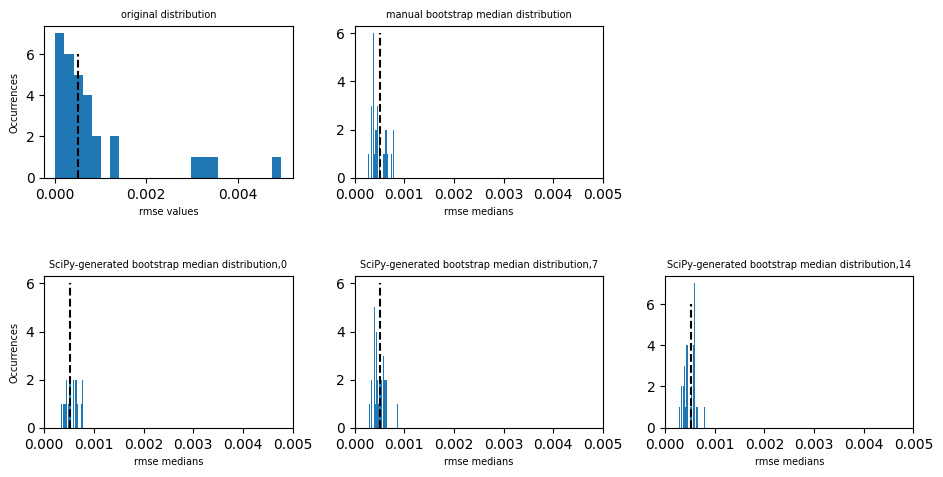

In [24]:
#Plot original sample, manual bootstrap and scipy bootstrap

#Figure Size                                                                                                                                                                                                
cm = 1/2.54  # centimeters in inches 
width=24*cm;height=12*cm #Width and height of plots 
matplotlib.rcParams['figure.figsize'] = [width, height]
rows=2;cols=3
#Fonts and sizes                                                     
size_axis=7;size_ticks=6;size_title=7

gs=gridspec.GridSpec(rows,cols)
gs.update(left=0.05,right=0.97,bottom=0.1,top=0.95,wspace=0.25,hspace=0.65)

#Original data
ax_00=plt.subplot(gs[0,0])
plt.title("original distribution",fontsize=size_title)
ax_00.hist(mmdltr,bins=25)
plt.xlabel('rmse values',fontsize=size_axis)
plt.ylabel('Occurrences',fontsize=size_axis)
ax_00.vlines(x=medians.rmse_mdl_train[0], ymin=0, ymax=6, color='k',linestyle='--')

#manual distribution of bootstrapped medians
ax_01=plt.subplot(gs[0,1])
plt.title("manual bootstrap median distribution", fontsize=size_title)
ax_01.hist(bootstrap_medians,bins=25)
ax_01.vlines(x=medians.rmse_mdl_train[0], ymin=0, ymax=6, color='k',linestyle='--')
plt.xlabel('rmse medians',fontsize=size_axis)

ax_01.set_xlim(0,0.005)

#distribution of bootstrapped medians
h=0
ax_02=plt.subplot(gs[1,0])
plt.title("SciPy-generated bootstrap median distribution," + str(h), fontsize=size_title)
ax_02.hist(bs_distributions[h],bins=25)
ax_02.vlines(x=medians.rmse_mdl_train[0], ymin=0, ymax=6, color='k',linestyle='--')
plt.xlabel('rmse medians',fontsize=size_axis)
plt.ylabel('Occurrences',fontsize=size_axis)
ax_02.set_xlim(0,0.005)

h=7
ax_11=plt.subplot(gs[1,1])
plt.title("SciPy-generated bootstrap median distribution," + str(h), fontsize=size_title)
ax_11.hist(bs_distributions[h],bins=25)
ax_11.vlines(x=medians.rmse_mdl_train[0], ymin=0, ymax=6, color='k',linestyle='--')
plt.xlabel('rmse medians',fontsize=size_axis)
ax_11.set_xlim(0,0.005)

h=14
ax_12=plt.subplot(gs[1,2])
plt.title("SciPy-generated bootstrap median distribution," + str(h), fontsize=size_title)
ax_12.hist(bs_distributions[h],bins=25)
ax_12.vlines(x=medians.rmse_mdl_train[0], ymin=0, ymax=6, color='k',linestyle='--')
plt.xlabel('rmse medians',fontsize=size_axis)
ax_12.set_xlim(0,0.005)

output_path='../../results/tutorial/'
name_fig='bootstrap_comparison.png'
plt.savefig(output_path+name_fig,dpi=300)

plt.show()

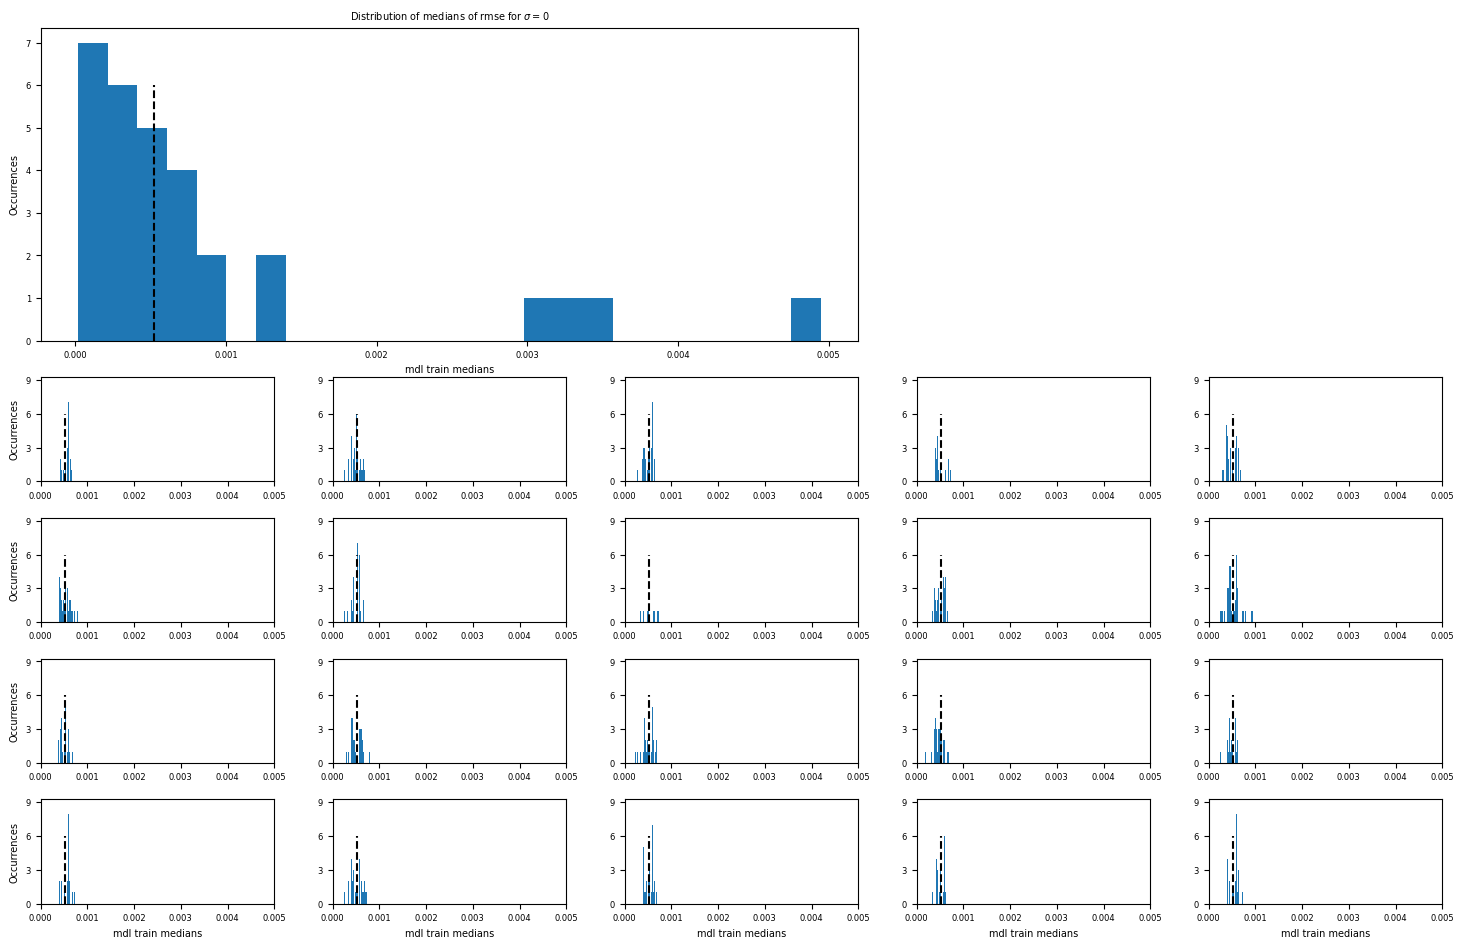

In [12]:
#Are bootstrap samplings representative of the median of the original distribution?

#20 bootstrapping samples in a panel figure
#Figure Size                                                                                                                                                                                                
cm = 1/2.54  # centimeters in inches 
width=40*cm;height=25*cm #Width and height of plots 
matplotlib.rcParams['figure.figsize'] = [width, height]
rows=5;cols=5
#Fonts and sizes                                                     
size_axis=7;size_ticks=6;size_title=7

gs=gridspec.GridSpec(rows,cols,height_ratios=[3,1,1,1,1])
gs.update(left=0.1,right=0.99,bottom=0.08,top=0.97,wspace=0.25,hspace=0.25)

#Original data
ax_00=plt.subplot(gs[0:3])
ax_00.hist(mmdltr,bins=25)
ax_00.vlines(x=medians.rmse_mdl_train[0], ymin=0, ymax=6, color='k',linestyle='--')

plt.title(r'Distribution of medians of rmse for $\sigma=0$', fontsize=size_title)
plt.xlabel('mdl train medians',fontsize=size_axis);plt.ylabel('Occurrences',fontsize=size_axis)
plt.xticks(fontsize=size_ticks); plt.yticks(fontsize=size_ticks)

#Plot bootstrap distribution
h=0
for r in range(1,rows):
    for c in range(cols):
        ax_rc=plt.subplot(gs[r,c])
        ax_rc.hist(bs_distributions[h],bins=25)
        ax_rc.vlines(x=medians.rmse_mdl_train[0], ymin=0, ymax=6, color='k',linestyle='--')

        ax_rc.set_xlim(0,0.005)
        ax_rc.set_ylim(0,9.25)
        ax_rc.set_yticks([0, 3, 6, 9])
        
        plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
        
        h+=1
        if r==rows-1:
            plt.xlabel('mdl train medians',fontsize=size_axis);
            
        if c==0:
            plt.ylabel('Occurrences',fontsize=size_axis)

output_path='../../results/tutorial/'
name_fig='bootstrap_sample.png'
plt.savefig(output_path+name_fig,dpi=300)

In [16]:
#Extend the minimal example to the four errors
median_errors_s0={'sigma':0.0}
for i in columns_errors:
    error=(list(sigma_0[i]),)
    print("**error name**: " + i)
    print(sigma_0[i])

    bs_iterations=20;
    bs_medians=[];bs_distributions=[]
    for j in range(bs_iterations):
        bs=bootstrap(error, np.median, n_resamples=30, confidence_level=0.9, random_state=None)
        bs_dist=bs.bootstrap_distribution; bs_distributions.append(bs_dist)
        median_bs=np.median(bs_dist)
        medians_bs.append(median_bs)

    median_errors_s0['error_' +i]=[np.var(medians_bs)]


median_errors_s0_df=pd.DataFrame.from_dict(median_errors_s0)
medians_sigma_0=medians.join(median_errors_s0_df.set_index('sigma'), on='sigma')

**error name**: rmse_nn_train
0     0.048355
1     0.015287
2     0.119820
3     0.043636
4     0.019958
5     0.012901
6     0.016011
7     0.014318
8     0.015660
9     0.002766
10    0.047267
11    0.013222
12    0.121765
13    0.044114
14    0.018833
15    0.059931
16    0.018701
17    0.005992
18    0.015532
19    0.001565
20    0.046595
21    0.019832
22    0.117593
23    0.049664
24    0.006120
25    0.011380
26    0.011676
27    0.003208
28    0.031579
29    0.001645
Name: rmse_nn_train, dtype: float64
**error name**: rmse_nn_test
0     0.034498
1     0.112211
2     0.574555
3     0.169878
4     0.070403
5     0.088791
6     0.093125
7     0.061244
8     0.099978
9     0.032740
10    0.050920
11    0.088909
12    0.591023
13    0.154027
14    0.071117
15    0.073311
16    0.120482
17    0.014743
18    0.119301
19    0.064217
20    0.051020
21    0.156076
22    0.562270
23    0.161644
24    0.026863
25    0.094250
26    0.079181
27    0.042032
28    0.192200
29    0.067220
Name:

In [18]:
#Repeat for the whole dataset
sigmas=[0.0, 0.02, 0.04,0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20]
median_errors={}

for sigma in sigmas:
    for i in columns_errors: 
        
        error=(list(sigma_0[i]),)
        bs_iterations=20;
        bs_medians=[];bs_distributions=[]
        
        for j in range(bs_iterations):
            bs=bootstrap(error, np.median, n_resamples=30, confidence_level=0.9, random_state=None)
            bs_dist=bs.bootstrap_distribution; bs_distributions.append(bs_dist)
            median_bs=np.median(bs_dist)
            bs_medians.append(median_bs)

        try:
            median_errors['error_' +i].append(np.var(bs_medians))
        except KeyError:
            median_errors['error_' +i]=[np.var(bs_medians)]

#Convert dict of median errors to dataframe                                              
median_errors_df=pd.DataFrame.from_dict(median_errors)
median_errors_df['sigma']=sigmas
display(median_errors_df)

#Join error dataframe to medians dataframe
medians=medians.join(median_errors_df.set_index('sigma'), on='sigma')
display(medians)

,error_rmse_nn_train,error_rmse_nn_test,error_rmse_mdl_train,error_rmse_mdl_test,sigma
0,7.202638e-07,0.000005,5.661792e-10,0.000012,0.00
1,6.311729e-07,0.000007,4.225854e-10,0.000016,0.02
2,7.452171e-07,0.000004,6.019340e-10,0.000007,0.04
3,8.032504e-07,0.000004,9.361456e-10,0.000010,0.06
4,7.057205e-07,0.000007,7.791938e-10,0.000008,0.08
5,9.929011e-07,0.000004,5.371735e-10,0.000008,0.10
6,9.562164e-07,0.000012,4.732673e-10,0.000016,0.12
7,1.029821e-06,0.000004,3.475368e-10,0.000009,0.14
8,7.929188e-07,0.000004,4.486963e-10,0.000014,0.16
9,6.140746e-07,0.000005,3.962678e-10,0.000012,0.18


ValueError: columns overlap but no suffix specified: Index(['error_rmse_nn_train', 'error_rmse_nn_test', 'error_rmse_mdl_train',
       'error_rmse_mdl_test'],
      dtype='object')